In [198]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
from math import log
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

## $ f(x) = x^2 + x + 1$ 

In [4]:
def f(x):
    return x ** 2 + x + 1

In [8]:
x_1 = np.linspace(start= -3 , stop=3, num=100)

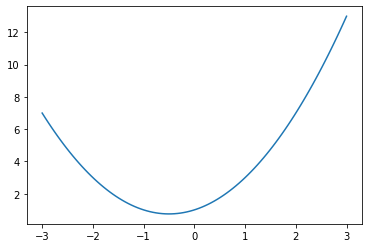

In [11]:
plt.plot(x_1, f(x_1))
plt.show()

In [5]:
def df(x):
    return 2*x + 1

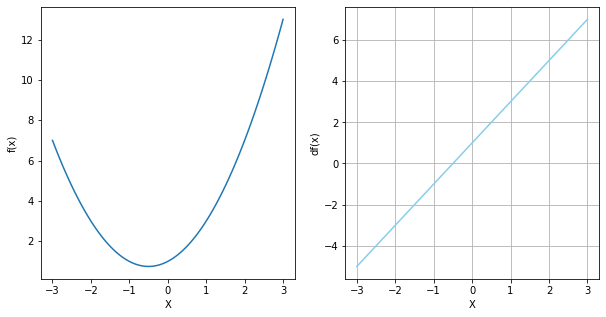

In [25]:
plt.figure(figsize=[10,5])

plt.subplot(1,2,1)
plt.ylabel('f(x)')
plt.xlabel('X')
plt.plot(x_1, f(x_1))


plt.subplot(1,2,2)
plt.grid()
plt.ylabel('df(x)')
plt.xlabel('X')
plt.plot(x_1, df(x_1), color='skyblue')

plt.show()

## Gradient

In [44]:
new_x = 3
previous_x = 0
step_multi = 0.1
percision = 0.0001

x_list = [new_x]
slope_list =  [df(nex_x)]


for n in range(100):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multi * gradient
    
    step_size = abs(new_x - previous_x)
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    if step_size < percision:
        print('Loop ran this many times:',n)
        break
    
    
print('Local minimum occure at:', new_x)
print('Slope or df(x) value at this point is:', df(new_x))
print('Cost or f(x) value at this point is:', f(new_x))

Loop ran this many times: 40
Local minimum occure at: -0.49962781616118024
Slope or df(x) value at this point is: 0.0007443676776395236
Cost or f(x) value at this point is: 0.7500001385208099


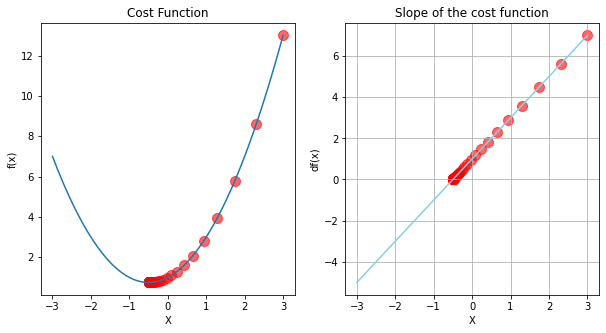

In [54]:
plt.figure(figsize=[10,5])

plt.subplot(1,2,1)
plt.title('Cost Function')
plt.ylabel('f(x)')
plt.xlabel('X')
plt.plot(x_1, f(x_1))

values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100,alpha=0.6)

# Chart 2
plt.subplot(1,2,2)  # row, column, number
plt.title('Slope of the cost function')
plt.grid()
plt.ylabel('df(x)')
plt.xlabel('X')
plt.plot(x_1, df(x_1), color='skyblue')
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.6)

plt.show()

## Multiple minima vs initial Guess

## $$g(x)= x^4 - 4x^2 + 5$$

In [132]:
x_2 = np.linspace(-2,2,1000)

In [50]:
x_2

array([-2.        , -1.995996  , -1.99199199, -1.98798799, -1.98398398,
       -1.97997998, -1.97597598, -1.97197197, -1.96796797, -1.96396396,
       -1.95995996, -1.95595596, -1.95195195, -1.94794795, -1.94394394,
       -1.93993994, -1.93593594, -1.93193193, -1.92792793, -1.92392392,
       -1.91991992, -1.91591592, -1.91191191, -1.90790791, -1.9039039 ,
       -1.8998999 , -1.8958959 , -1.89189189, -1.88788789, -1.88388388,
       -1.87987988, -1.87587588, -1.87187187, -1.86786787, -1.86386386,
       -1.85985986, -1.85585586, -1.85185185, -1.84784785, -1.84384384,
       -1.83983984, -1.83583584, -1.83183183, -1.82782783, -1.82382382,
       -1.81981982, -1.81581582, -1.81181181, -1.80780781, -1.8038038 ,
       -1.7997998 , -1.7957958 , -1.79179179, -1.78778779, -1.78378378,
       -1.77977978, -1.77577578, -1.77177177, -1.76776777, -1.76376376,
       -1.75975976, -1.75575576, -1.75175175, -1.74774775, -1.74374374,
       -1.73973974, -1.73573574, -1.73173173, -1.72772773, -1.72

In [131]:
def g(x):
    return x**4 - 4*x**2+5

def dg(x):
    return 4*x**3 - 8*x

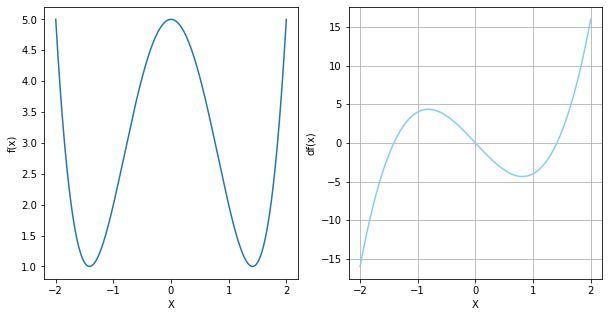

In [34]:
plt.figure(figsize=[10,5])

plt.subplot(1,2,1)
plt.ylabel('f(x)')
plt.xlabel('X')
plt.plot(x_2, g(x_2))


plt.subplot(1,2,2)
plt.grid()
plt.ylabel('df(x)')
plt.xlabel('X')
plt.plot(x_2, dg(x_2), color='skyblue')

plt.show()

In [6]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02 ,percision = 0.001 , max_iter = 300):
    
    new_x = initial_guess
    x_list = [new_x]
    slope_list =  [derivative_func(new_x)]


    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < percision:
            break
    return new_x, x_list, slope_list


In [61]:
local_min, list_x, deriv_list = gradient_descent(dg
                                                 ,0.5
                                                 ,0.02
                                                 ,0.001)

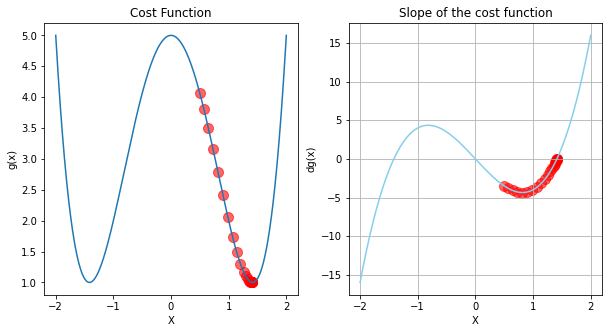

In [62]:
plt.figure(figsize=[10,5])

plt.subplot(1,2,1)
plt.title('Cost Function')
plt.ylabel('g(x)')
plt.xlabel('X')
plt.plot(x_2, g(x_2))
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100,alpha=0.6)

# Chart 2
plt.subplot(1,2,2)  # row, column, number
plt.title('Slope of the cost function')
plt.grid()
plt.ylabel('dg(x)')
plt.xlabel('X')
plt.plot(x_2, dg(x_2), color='skyblue')
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.6)

plt.show()

# Example 3 - Divergence, overflow and Python tuples
## $$ h(x) = x^5 - 2x^4 +2 $$ 

In [31]:
x_3 = np.linspace(start=-2.5, stop = 2.5, num=1000)

In [135]:
def h(x):
    return x**5 - 2*x**4 + 2

In [33]:
def dh(x):
    return 5*x**4 - 8*x**3

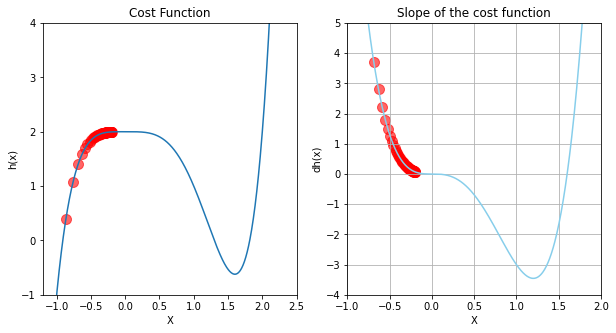

Local minimum occurs at: -2071072.4470816324
Cost at tihs min is: 9.199230561666396e+25
Number of steps: 71


In [46]:
local_min, list_x, deriv_list = gradient_descent(derivative_func= dh
                                                 , initial_guess= -0.2
                                                 , max_iter = 70)

plt.figure(figsize=[10,5])

plt.subplot(1,2,1)
plt.xlim(-1.2, 2.5)
plt.ylim(-1,4)

plt.title('Cost Function')
plt.ylabel('h(x)')
plt.xlabel('X')

plt.plot(x_3, h(x_3))
plt.scatter(list_x, h(np.array(list_x)), color='red', s=100,alpha=0.6)

# Chart 2
plt.subplot(1,2,2)  # row, column, number
plt.xlim(-1, 2)
plt.ylim(-4,5)

plt.title('Slope of the cost function')
plt.grid()
plt.ylabel('dh(x)')
plt.xlabel('X')

plt.plot(x_3, dh(x_3), color='skyblue')
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.6)

plt.show()

print('Local minimum occurs at:', local_min)
print('Cost at tihs min is:', dh(local_min))
print('Number of steps:', len(list_x))

# Learning rate

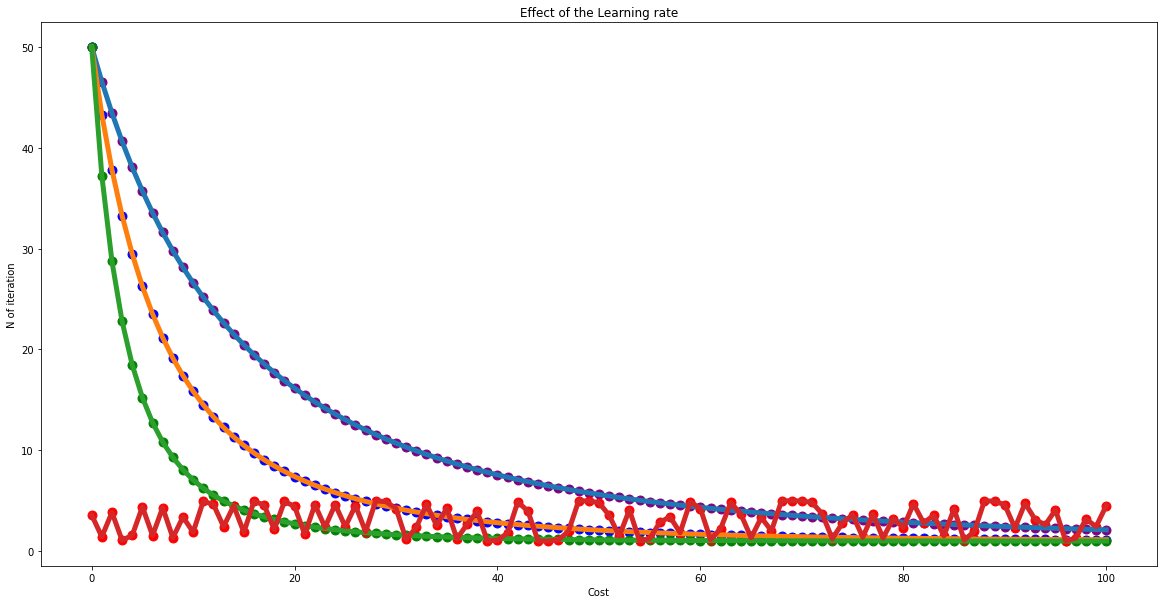

In [58]:
n  = 100
low_gamma = gradient_descent(derivative_func= dg
                                                 ,initial_guess= 3
                                                 ,percision = 0.0001
                                                 ,multiplier = 0.0005
                                                 ,max_iter = n)

mid_gamma = gradient_descent(derivative_func= dg
                                                 ,initial_guess= 3
                                                 ,percision = 0.0001
                                                 ,multiplier = 0.001
                                                 ,max_iter = n)
high_gamma = gradient_descent(derivative_func= dg
                                                 ,initial_guess= 3
                                                 ,percision = 0.0001
                                                 ,multiplier = 0.002
                                                 ,max_iter = n)
insane_gamma = gradient_descent(derivative_func= dg
                                                 ,initial_guess= 1.9
                                                 ,percision = 0.0001
                                                 ,multiplier = 0.25
                                                 ,max_iter = n)
# Y axis Data:
low_values = np.array(low_gamma[1])

# X axis Data:
iteration_list = list(range(0,n+1))


plt.figure(figsize=[20,10])


plt.title('Effect of the Learning rate')
plt.ylabel('N of iteration')
plt.xlabel('Cost')

# Low_gamma
plt.plot(iteration_list, g(low_values),  linewidth = 5)
plt.scatter(iteration_list, g(low_values), color='purple', s=80)

# Mid gamme
plt.plot(iteration_list, g(np.array(mid_gamma[1])), linewidth = 5)
plt.scatter(iteration_list, g(np.array(mid_gamma[1])), color='blue', s=80)

# High gamme
plt.plot(iteration_list, g(np.array(high_gamma[1])), linewidth = 5)
plt.scatter(iteration_list, g(np.array(high_gamma[1])), color='green',  s=80)

# Intrr
plt.plot(iteration_list, g(np.array(insane_gamma[1])), linewidth = 5)
plt.scatter(iteration_list, g(np.array(insane_gamma[1])), color='red',  s=80)

plt.show()

# Example 4 - Data Viz with 3D Charts
## Minimise $$ f(x,y) = \frac{1}{3^{-x^2 - y^2} +1} $$
Minimise $$ f(x,y) = \frac{1}{r+1}$$ where $r$ is ${3^{-x^2 - y^2}} $

In [78]:
def f(x,y):
    r = 3**(-x**2 -y**2)
    return 1 / (r+1)

In [105]:
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

x_4,y_4 = np.meshgrid(x_4, y_4)

In [80]:
x_4.shape

(200, 200)

C:\Users\user\AppData\Local\Temp/ipykernel_15228/551293799.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


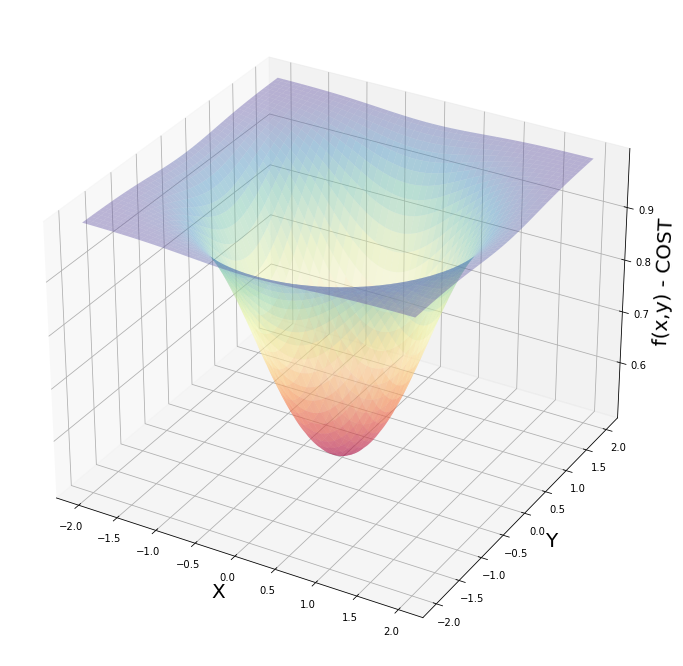

In [106]:
# Generating 3D plot
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')

ax.set_ylabel('Y', fontsize=20)
ax.set_xlabel('X', fontsize=20)
ax.set_zlabel('f(x,y) - COST', fontsize=20)


ax.plot_surface(x_4,y_4, f(x_4,y_4), cmap=cm.Spectral, alpha=0.4)

plt.show()

# Partial Derivatives and Symbolic Computation

In [107]:
from sympy import symbols, diff

In [110]:
a,b = symbols('x,y')

In [121]:
f(a,b)

1/(3**(-x**2 - y**2) + 1)

In [136]:
diff(h(a) ,a)

5*x**4 - 8*x**3

In [122]:
diff(f(a,b) ,a)

2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2

In [128]:
print('Our cost function f(x,y) is:', f(a,b))
print('Partial derivative wrt x is is:', diff(f(a,b) ,a))
print('Value of f(x,y) at x=1.8 and y=1 is:',
      f(a,b).evalf(subs={a:1.8, b:1.0}))
diff(f(a,b) ,a).evalf(subs={a:1.8, b:1.0})

Our cost function f(x,y) is: 1/(3**(-x**2 - y**2) + 1)
Partial derivative wrt x is is: 2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x,y) at x=1.8 and y=1 is: 0.990604794032582


0.0368089716197505

# Batch Gradient Descent with Sympy

In [143]:
multiplier= 0.1
max_iter = 200
params = np.array([1.8,1.0])

for n in range(max_iter):
    gradient_x = diff(f(a,b) ,a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a,b) ,b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    
    params = params - multiplier * gradients
    
print('Values in gradiet array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is:', f(params[0], params[1]))

Values in gradiet array [0.000461440542096373 0.000256355856720208]
Minimum occurs at x value of:  0.000793898510134722
Minimum occurs at y value of:  0.000441054727852623
The cost is: 0.500000226534985


In [146]:
def fpx(x,y):
    r = 3**(-x**2 - y**2)
    return 2*x**log(3)*r/ (r+1)**2

def fpy(x,y):
    r = 3**(-x**2 - y**2)
    return 2*y**log(3)*r/ (r+1)**2    

In [147]:
fpx(1.8,1.0)

0.03550440488795663

In [148]:
fpy(1.8,1.0)

0.018613872144494944

In [149]:
multiplier= 0.1
max_iter = 200
params = np.array([1.8,1.0])

for n in range(max_iter):
    gradient_x = fpx(1.8,1.0)
    gradient_y = fpy(1.8,1.0)
    gradients = np.array([gradient_x, gradient_y])
    
    params = params - multiplier * gradients
    
print('Values in gradiet array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is:', f(params[0], params[1]))

Values in gradiet array [0.0355044  0.01861387]
Minimum occurs at x value of:  1.0899119022408794
Minimum occurs at y value of:  0.6277225571100988
The cost is: 0.8504255537651795


# Graphing 3D Gradient Descent & Adv Numpy arrays

In [159]:
multiplier= 0.1
max_iter = 500
params = np.array([1.8,1.0])
values_array = params.reshape(1,2)
print(values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(1.8,1.0)
    gradient_y = fpy(1.8,1.0)
    gradients = np.array([gradient_x, gradient_y])    
    params = params - multiplier * gradients
    values_array = np.append(values_array, params.reshape(1,2), axis=0)
    
print('Values in gradiet array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is:', f(params[0], params[1]))

(1, 2)
Values in gradiet array [0.0355044  0.01861387]
Minimum occurs at x value of:  0.02477975560217531
Minimum occurs at y value of:  0.0693063927752475
The cost is: 0.501487904557813


C:\Users\user\AppData\Local\Temp/ipykernel_15228/1481262976.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


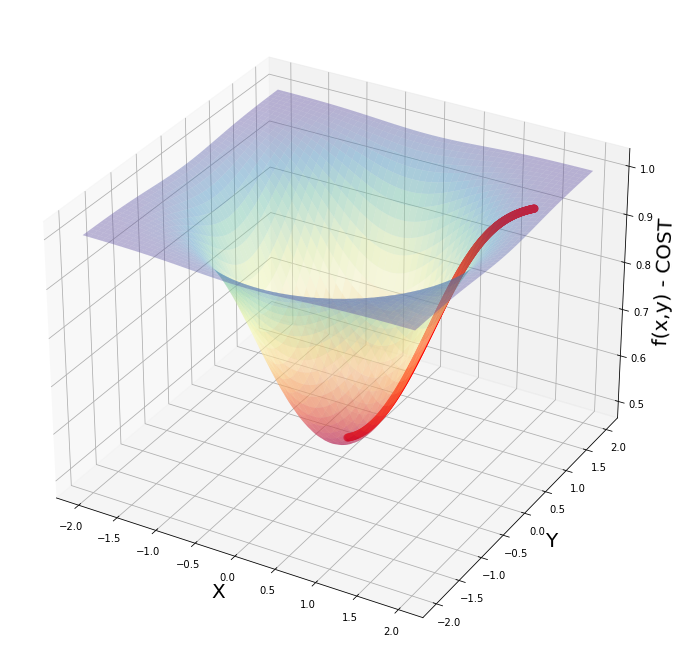

In [160]:
# Generating 3D plot
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')

ax.set_ylabel('Y', fontsize=20)
ax.set_xlabel('X', fontsize=20)
ax.set_zlabel('f(x,y) - COST', fontsize=20)


ax.plot_surface(x_4,y_4, f(x_4,y_4), cmap=cm.Spectral, alpha=0.4)
ax.scatter(values_array[:,0], values_array[:,1], 
           f(values_array[:,0], values_array[:,1]), s=50, color='red')

plt.show()

# Example 5 - working with Data & a Real Cost function

## Mean Squared Error: a cost function for regression problems 
## $$ RSS = \sum_{i=n}^n \big(y^{(i) - h_\theta x^{(i)} } \big)^2 $$
## $$ MSE = \frac{1}{n} \sum_{i=n}^n \big(y^{(i) - h_\theta x^{(i)} } \big)^2 $$
## $$ MSE = \frac{1}{n} \sum_{i=n}^n \big(y - \hat{y} \big)^2 $$

In [168]:
x_5 = np.array([[0.1,1.2,2.4,3.2,4.1,5.7,6.5]]).transpose()
y_5 = np.array([[1.7,2.4,3.5,3.0,6.1,9.4,8.2]]).transpose()

In [164]:
reg = LinearRegression()

In [169]:
reg.fit(x_5,y_5)

LinearRegression()

In [178]:
print(reg.intercept_[0])
print(reg.coef_[0][0])

0.8475351486029536
1.2227264637835915


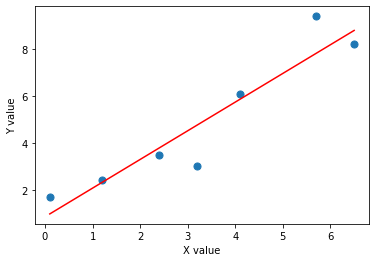

In [185]:
plt.scatter(x_5,y_5, s=50)
plt.plot(x_5, reg.predict(x_5), color='red')
plt.xlabel('X value')
plt.ylabel('Y value')

plt.show()

In [ ]:
# y_hat = theta0 + theta1 * x

In [190]:
y_hat = reg.intercept_[0] + reg.coef_[0][0] * x_5
print('Est values y_hat are: \n',y_hat)

Est values y_hat are: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]


In [196]:
def mse(y, y_hat):
    return 1/y.size *sum((y- y_hat)**2)

In [197]:
mse(y_5,y_hat)

array([0.94796558])

In [201]:
print('Manually calculated MSE: ', mse(y_5,y_hat))
print('MSE regression using manual calc is: ', mean_squared_error(y_5,y_hat))
print('MSE regression is: ', mean_squared_error(y_5,reg.predict(x_5)))

Manually calculated MSE:  [0.94796558]
MSE regression using manual calc is:  0.9479655759794577
MSE regression is:  0.9479655759794577


# 3D plot for MSE cost function

In [217]:
n_theta = 200
theta_0 = np.linspace(start=-1,stop=3, num=n_theta)
theta_1 =np.linspace(start=-1,stop=3, num=n_theta)

plot_0, plot_1 = np.meshgrid(theta_0, theta_1)

### calc MSE used nested for loops 

In [218]:
plot_cost = np.zeros((n_theta,n_theta))

In [219]:
for i in range(n_theta):
    for j in range(n_theta):
        y_hat = plot_0[i][j] +plot_1[i][j] * x_5
        plot_cost[i][j] = mse(y_5,y_hat)

In [220]:
plot_cost

array([[108.51285714, 108.14283763, 107.77362617, ...,  51.2194266 ,
         51.00859498,  50.79857143],
       [106.88158925, 106.51424787, 106.14771456, ...,  50.11575289,
         49.90759941,  49.700254  ],
       [105.262904  , 104.89824077, 104.5343856 , ...,  49.02466182,
         48.81918649,  48.61451922],
       ...,
       [ 30.0738157 ,  30.23139037,  30.38977309, ...,  76.71643873,
         77.03320129,  77.35077191],
       [ 30.92133081,  31.08158362,  31.24264449, ...,  78.09154801,
         78.41098872,  78.73123749],
       [ 31.78142857,  31.94435952,  32.10809853, ...,  79.47923995,
         79.8013588 ,  80.12428571]])

C:\Users\user\AppData\Local\Temp/ipykernel_15228/1060922000.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


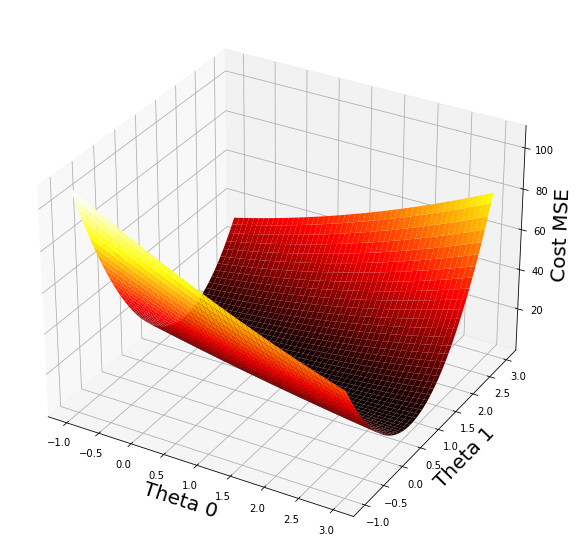

In [250]:
fig = plt.figure(figsize=[10,10])
ax = fig.gca(projection='3d')


ax.set_xlabel('Theta 0',fontsize=20)
ax.set_ylabel('Theta 1',fontsize=20)
ax.set_zlabel('Cost MSE' ,fontsize=20)

ax.plot_surface(plot_0,plot_1,plot_cost, cmap=cm.hot)

plt.show()

In [225]:
ij_min = np.unravel_index(indices=plot_cost.argmin(), dims=plot_cost.shape)

C:\Users\user\AppData\Local\Temp/ipykernel_15228/1004135646.py:1: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  ij_min = np.unravel_index(indices=plot_cost.argmin(), dims=plot_cost.shape)


In [234]:
print('Min value of cost:', plot_cost.min())
print('Min occurs at (i,j):', ij_min)
print(f'Min MSE for Theta 0 at plot{ij_min[0],ij_min[1]}:', plot_0[ij_min[0],ij_min[1]])
print(f'Min MSE for Theta 1 at plot{ij_min[0],ij_min[1]}:', plot_1[ij_min[0],ij_min[1]])

Min value of cost: 0.9483826526747163
Min occurs at (i,j): (111, 91)
Min MSE for Theta 0 at plot(111, 91): 0.829145728643216
Min MSE for Theta 1 at plot(111, 91): 1.2311557788944723


## Partial Derivatives of MSE w.r.t $\theta_0$ AND $\theta_1$

## $$ \frac{\partial MSE} {\partial \theta_0} = -\frac{2}{n} \sum_{i=n}^n \big(y^{(i)} - \theta_0 - \theta_1\ x^{(i)} \big) $$
## $$ \frac{\partial MSE} {\partial \theta_1} = -\frac{2}{n} \sum_{i=n}^n \big(y^{(i)} - \theta_0 - \theta_1\ x^{(i)} \big) \big( x^{(i)}\big) $$

## MSE & Gradient Descent

In [235]:
def grad(x,y,thetas): 
    n = y.size
    
    theta0_slope = -2/n * sum(y-thetas[0] - thetas[1]*x)
    theta1_slope = -2/n * sum((y-thetas[0] - thetas[1]*x)*x)
    
    return np.append(arr=theta0_slope, values=theta1_slope)

In [240]:
multiplier = 0.01
thetas = np.array([2.9,2.9])

plot_vals = thetas.reshape(1,2)
mse_vals = mse(y_5, thetas[0] + thetas[1]*x_5)

for i in range(1000):
    thetas = thetas - multiplier * grad(x_5,y_5,thetas)
    
    
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1,2)), axis=0)
    mse_vals = np.append(arr=mse_vals,values=mse(y_5, thetas[0] + thetas[1]*x_5))
    
print('Min occurs at Theta 0',thetas[0])
print('Min occurs at Theta 1',thetas[1])
print('MSE is:', mse(y_5, thetas[0] + thetas[1]*x_5))

Min occurs at Theta 0 0.8532230461743415
Min occurs at Theta 1 1.2214935332607393
MSE is: [0.94797511]


C:\Users\user\AppData\Local\Temp/ipykernel_15228/3355644745.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


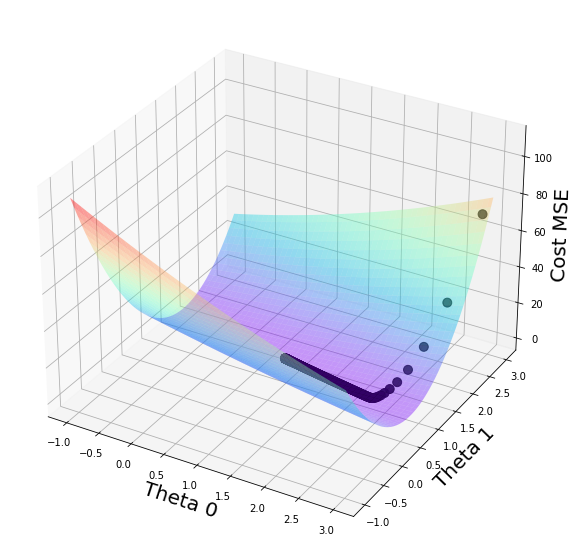

In [249]:
fig = plt.figure(figsize=[10,10])
ax = fig.gca(projection='3d')


ax.set_xlabel('Theta 0',fontsize=20)
ax.set_ylabel('Theta 1',fontsize=20)
ax.set_zlabel('Cost MSE' ,fontsize=20)

ax.scatter(plot_vals[:,0],plot_vals[:,1], mse_vals , s=80, color='black')
ax.plot_surface(plot_0,plot_1,plot_cost, alpha=0.4, cmap=cm.rainbow)

plt.show()